# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
oil_well_1 = pd.read_csv('/datasets/geo_data_0.csv')
oil_well_2 = pd.read_csv('/datasets/geo_data_1.csv')
oil_well_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
oil_well_1.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [4]:
oil_well_2.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [5]:
oil_well_3.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [6]:
oil_well_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
oil_well_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
oil_well_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
oil_well_1 = oil_well_1.drop(['id'], axis=1)
oil_well_2 = oil_well_2.drop(['id'], axis=1)
oil_well_3 = oil_well_3.drop(['id'], axis=1)

In [10]:
print('Количесво нулевых значений объёма запасов в первой скважине:', oil_well_1[oil_well_1['product'] == 0]['product'].count())
print('Количесво нулевых значений объёма запасов во второй скважине:', oil_well_2[oil_well_2['product'] == 0]['product'].count())
print('Количесво нулевых значений объёма запасов в третьей скважине:', oil_well_3[oil_well_3['product'] == 0]['product'].count())

Количесво нулевых значений объёма запасов в первой скважине: 1
Количесво нулевых значений объёма запасов во второй скважине: 8235
Количесво нулевых значений объёма запасов в третьей скважине: 1


8,2% значений объёма запасов во второй скважине отсутсвуют. Скорее всего по ходу исследования в данной скважине не было обнаружено запасов, либо эти данные могли быть утеряны

Text(0, 0.5, 'Количество скважин')

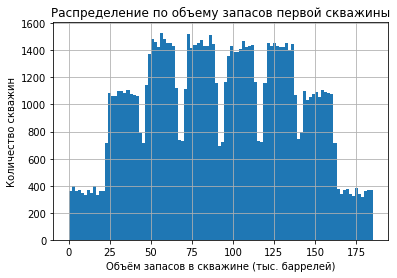

In [11]:
oil_well_1['product'].hist(bins = 100)
plt.title("Распределение по объему запасов первой скважины")
plt.xlabel("Объём запасов в скважине (тыс. баррелей)")
plt.ylabel("Количество скважин")

Text(0, 0.5, 'Количество скважин')

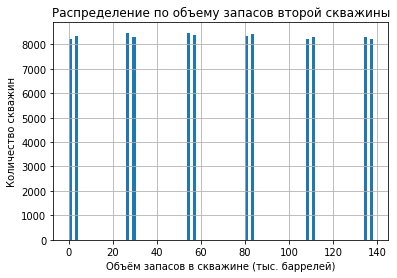

In [12]:
oil_well_2['product'].hist(bins = 100)
plt.title("Распределение по объему запасов второй скважины")
plt.xlabel("Объём запасов в скважине (тыс. баррелей)")
plt.ylabel("Количество скважин")

Text(0, 0.5, 'Количество скважин')

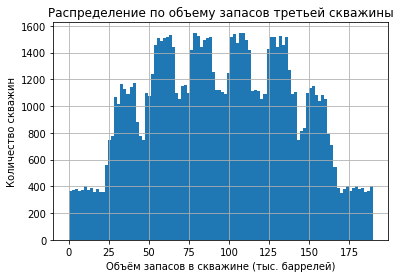

In [13]:
oil_well_3['product'].hist(bins = 100)
plt.title("Распределение по объему запасов третьей скважины")
plt.xlabel("Объём запасов в скважине (тыс. баррелей)")
plt.ylabel("Количество скважин")

По гистограммам можно заметить, что распредление у первой и третьей скважин близкое к нормальному, гистограмма объема запасов во второй скважине имеет странное распредление -  все значения более менее равномерно распределены с шагом ~20 друг о друга

## Обучение и проверка модели

In [14]:
def test_split(data, target):
    features = data.drop([target] , axis=1)
    target = data[target]

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    
    return features_train, features_valid, target_train, target_valid

In [15]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = test_split(oil_well_1, 'product')
features_train_2, features_valid_2, target_train_2, target_valid_2 = test_split(oil_well_2, 'product')
features_train_3, features_valid_3, target_train_3, target_valid_3 = test_split(oil_well_3, 'product')

Обучим модель и сделаем предсказания на валидационной выборке. Сохраним предсказания и правильные ответы на валидационной выборке.

In [16]:
def lr_model(data, features_train, target_train, features_valid, target_valid):
    model = LinearRegression(normalize=True)
    model.fit(features_train, target_train)
    prediction = model.predict(features_valid)
    df = {'real_product' : target_valid,
            'predicted_product' : prediction         
    }
    data_frame = pd.DataFrame(df, columns = ['real_product', 'predicted_product'])
    mean = round(df['predicted_product'].mean(),3)
    rmse = round(mean_squared_error(target_valid, prediction)**0.5,3)
    
    return data_frame, mean, rmse

In [17]:
oil_well_predicted_1, product_mean_1, rmse_1 = lr_model(oil_well_1, features_train_1, target_train_1, features_valid_1, target_valid_1)
oil_well_predicted_2, product_mean_2, rmse_2 = lr_model(oil_well_2, features_train_2, target_train_2, features_valid_2, target_valid_2)
oil_well_predicted_3, product_mean_3, rmse_3 = lr_model(oil_well_3, features_train_3, target_train_3, features_valid_3, target_valid_3)

In [18]:
print('Для первого региона:')
print('средний запас предсказанного сырья равен', product_mean_1)
print('rmse равен', rmse_1)
print()
print('Для второго региона:')
print('средний запас предсказанного сырья равен', product_mean_2)
print('rmse равен', rmse_2)
print()
print('Для третьего региона:')
print('средний запас предсказанного сырья равен', product_mean_3)
print('rmse равен', rmse_3)

Для первого региона:
средний запас предсказанного сырья равен 92.593
rmse равен 37.579

Для второго региона:
средний запас предсказанного сырья равен 68.729
rmse равен 0.893

Для третьего региона:
средний запас предсказанного сырья равен 94.965
rmse равен 40.03




По результатам расчета rmse для второго региона имеет минимальное значение (0.893), это говорит о том, что данная модель лучше всего предсказала запасы сырья по второму региону. Далее следуют rmse для первого региона - 37.579 и rmse для третьего региона - 40.03

Низкое значение rmse для второго региона может быть обусловлено тем, что по этому региону отсутствует большая часть данных по объёму запасов в скважине. Возможно, данное месторождение не стоит рассматривать как прибыльное

## Подготовка к расчёту прибыли

Сохраним все ключевые значения для расчётов в отдельных переменных. После чего рассчитаем достаточный объём сырья для безубыточной разработки новой скважины и сравним полученный объём сырья со средним запасом в каждом регионе:

In [19]:
all_points = 500 # все исследуемые точки региона
best_points = 200 # лучшие выбранные точки для разработки
budget = 10e9 # бюджет на разработку скважин
price_per_barrel = 450000 # цена за один баррель 

In [20]:
mean_profit_best_points = budget / best_points
average_oil_volume = budget / price_per_barrel
average_oil_volume_point = mean_profit_best_points  / price_per_barrel

print('Средняя прибыль на лучшую точку равна', round(mean_profit_best_points,3), 'тыс.рублей')
print('Средний объем нефти на регион равен', round(average_oil_volume,3), 'тыс.барелей')
print('Средний объем нефти на точку равен', round(average_oil_volume_point,3), 'тыс.барелей')

Средняя прибыль на лучшую точку равна 50000000.0 тыс.рублей
Средний объем нефти на регион равен 22222.222 тыс.барелей
Средний объем нефти на точку равен 111.111 тыс.барелей


Выведем среднее количество запасов нефти на скважину в каждом регионе:

In [21]:
print('Средний запас нефти в первом регионе равен', round(oil_well_1['product'].mean(),3))
print('Средний запас нефти во втором регионе равен', round(oil_well_2['product'].mean(),3))
print('Средний запас нефти в третьем регионе равен', round(oil_well_3['product'].mean(),3))

Средний запас нефти в первом регионе равен 92.5
Средний запас нефти во втором регионе равен 68.825
Средний запас нефти в третьем регионе равен 95.0




- рассчитали средние показатели:
    - прибыли на точку - 50000000 тыс.рублей
    - объема нефти на регион - 22222 тыс.барелей 
    - объем нефты на точку - 111 тыс.барелей
- средний запас нефти в первом, втором и третьем регионах равны соответсвенно - 92.5, 68.8 и 95 тыс.барелей.

Ни один из регионов по средним значениям запасов не дотягивает до необходимого минимума, то есть уже на этом этапе мы можем подозревать риски

## Расчёт прибыли и рисков 

Напишем функцию для расчёта прибыли:

In [22]:
def oil_profit(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return price_per_barrel * selected.sum() - budget

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли. Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков

In [23]:
state = np.random.RandomState(12345)
def bootstrap_1000(target, probs):
    values=[]
    lost = 0
    for i in range(1000):
        target_subsample = target.sample(n=all_points, replace=True, random_state=state)
        probs_subsample = probs[target_subsample.index]
        profit = oil_profit(target, probs_subsample, best_points)
        if profit < 0:
            lost +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean = values.mean()
    risk = lost / 1000
    return mean, lower, upper, risk

In [24]:
mean_1, lower_1, upper_1, risk_1 = bootstrap_1000(oil_well_predicted_1['real_product'], 
                                                     oil_well_predicted_1['predicted_product'])
print('Для первого региона:')
print('Средняя прибыль равна', round(mean_1,2))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_1, upper_1))
print('Процент риска {:.2%}'.format(risk_1))

Для первого региона:
Средняя прибыль равна 396164984.8
95% доверительный интервал от -111215545.89 до 909766941.55 тыс.руб.
Процент риска 6.90%


In [25]:
mean_2, lower_2, upper_2, risk_2 = bootstrap_1000(oil_well_predicted_2['real_product'], 
                                                     oil_well_predicted_2['predicted_product'])
print('Для второго региона:')
print('Средняя прибыль равна', round(mean_2,2))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_2, upper_2))
print('Процент риска {:.2%}'.format(risk_2))

Для второго региона:
Средняя прибыль равна 461155817.28
95% доверительный интервал от 78050810.75 до 862952060.26 тыс.руб.
Процент риска 0.70%


In [26]:
mean_3, lower_3, upper_3, risk_3 = bootstrap_1000(oil_well_predicted_3['real_product'], 
                                                     oil_well_predicted_3['predicted_product'])
print('Для третьего региона:')
print('Средняя прибыль равна', round(mean_3,2))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_3, upper_3))
print('Процент риска {:.2%}'.format(risk_3))

Для третьего региона:
Средняя прибыль равна 392950475.17
95% доверительный интервал от -112227625.38 до 934562914.55 тыс.руб.
Процент риска 6.50%




Рассчитали среднюю прибыль, 95%-й доверительный интервал и риск убытков для каждого региона. В 1-ом и 3-ем регионах имеем большие риски, поэтому их можем отсеять. Вероятность убытков для второго региона составила 1.3%, также этот регион имеет наибольшую среднюю прибыль - 448275289.23 рублей

## Общий Вывод

#### 1. Изучили данные и подготовили их к обучению

#### 2. Обучили и проверили модель для каждого региона:

- По результатам расчета rmse для второго региона имеет минимальное значение (0.893), это говорит о том, что данная модель лучше всего предсказала запасы сырья по второму региону. Далее следуют rmse для первого региона - 37.579 и rmse для третьего региона - 40.03

#### 3. Подготовили данные к расчёту прибыли:
- рассчитали средние показатели:
    - прибыли на точку - 50000000 тыс.рублей
    - объема нефти на регион - 22222 тыс.барелей 
    - объем нефты на точку - 111 тыс.барелей
- средний запас нефти в первом, втором и третьем регионах равны соответсвенно - 92.5, 68.8 и 95 тыс.барелей.

- Ни один из регионов по средним значениям запасов не дотягивает до необходимого минимума, то есть уже на этом этапе мы можем подозревать риски


#### 4. Написали функцию для расчёта прибыли и с помощью техники Bootstrap с 1000 выборок нашли распределение прибыли, среднюю прибыль, 95%-й доверительный интервал и риск убытков
- Для первого региона:
    - Средняя прибыль равна 393802509.35
    - 95% доверительный интервал от -119777878.11 до 909313235.74 тыс.руб.
    - Процент риска 5.70%
- Для второго региона:
    - Средняя прибыль равна 448275289.23
    - 95% доверительный интервал от 50275475.26 до 836625980.88 тыс.руб.
    - Процент риска 1.30%
- Для третьего региона:
    - Средняя прибыль равна 389981548.69
    - 95% доверительный интервал от -121408203.61 до 921059769.19 тыс.руб.
    - Процент риска 7.30%
    
В первом и третьем регионах имеем большие риски, поэтому их можем отсеять. Вероятность убытков для второго региона составила 1.3%, также этот регион имеет наибольшую среднюю прибыль - 448275289.23 рублей. Хотя данные не выглядят нормально распределенными, второй регион получился одним из лучших по показателям, поэтому для разработки скважин выдвигаем этот второй регион.